# Installing the required libraries

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
Image_Size= 256
Batch_Size = 32
Channels=3
Epochs=55

In [4]:
imgdata = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\Shravani Gawali\\Music\\data",
    shuffle=True,
    image_size = (Image_Size,Image_Size),
    batch_size=Batch_Size

)

Found 2041 files belonging to 2 classes.


In [5]:
class_names = imgdata.class_names
class_names  # 0 means fake and 1 means real

['fake', 'real']

In [6]:
for image_batch, label_batch in imgdata.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1]


## Displaying our first image

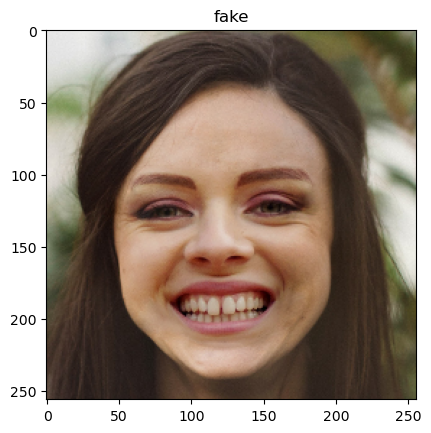

In [7]:
for image_batch, label_batch in imgdata.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [8]:
def splitting_dataset_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size=len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split * ds_size)
    val_size= int(val_split * ds_size)

    train_ds= ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [9]:
train_ds, val_ds, test_ds=splitting_dataset_tf(imgdata)

In [10]:
print(len(train_ds),len(val_ds),len(test_ds))

51 6 7


In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_and_rescale = tf.keras.Sequential([  
    layers.Resizing(Image_Size, Image_Size),  
    layers.Rescaling(1.0 / 255)  
])  

In [13]:
data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),

])

In [14]:
input_shape = (Batch_Size,Image_Size, Image_Size,Channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_aug,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation= 'softmax'),

])

model.build(input_shape=input_shape)

D:\Apk\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
# Model Training with Training and Validation Data
history = model.fit(
    train_ds,
    epochs=275,
    batch_size=Batch_Size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/275
51/51 ━━━━━━━━━━━━━━━━━━━━ 34s 498ms/step - accuracy: 0.4650 - loss: 0.8288 - val_accuracy: 0.4896 - val_loss: 0.7050
Epoch 2/275
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 510ms/step - accuracy: 0.5284 - loss: 0.6987 - val_accuracy: 0.5104 - val_loss: 0.7056
Epoch 3/275
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 486ms/step - accuracy: 0.4822 - loss: 0.7093 - val_accuracy: 0.5104 - val_loss: 0.6953
Epoch 4/275
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 482ms/step - accuracy: 0.4899 - loss: 0.6996 - val_accuracy: 0.5208 - val_loss: 0.6927
Epoch 5/275
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 480ms/step - accuracy: 0.5173 - loss: 0.6952 - val_accuracy: 0.5156 - val_loss: 0.6924
Epoch 6/275
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 482ms/step - accuracy: 0.5047 - loss: 0.7004 - val_accuracy: 0.5104 - val_loss: 0.6979
Epoch 7/275
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 483ms/step - accuracy: 0.5203 - loss: 0.6938 - val_accuracy: 0.5521 - val_loss: 0.6909
Epoch 8/275
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 480ms/step - accuracy: 0.5258 - loss: 0.6944 - 

In [17]:
scores = model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.8553 - loss: 0.3752


### accuracy of the model is 85.53%

first image to predict
Actual label :  real
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
Pred label :  real


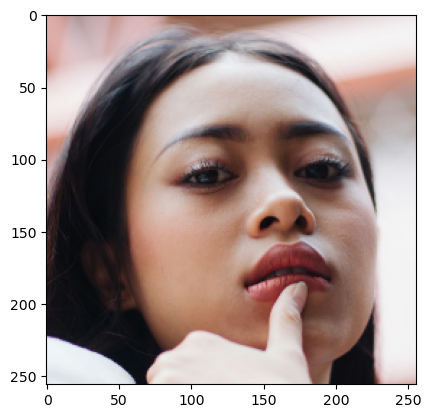

In [18]:
import numpy as np

for image_batch, label_batch in imgdata.take(1):

    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label : ",class_names[first_label])


    batch_pred = model.predict(image_batch)
    print("Pred label : ",class_names[np.argmax(batch_pred[0])])

In [19]:
def pred(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


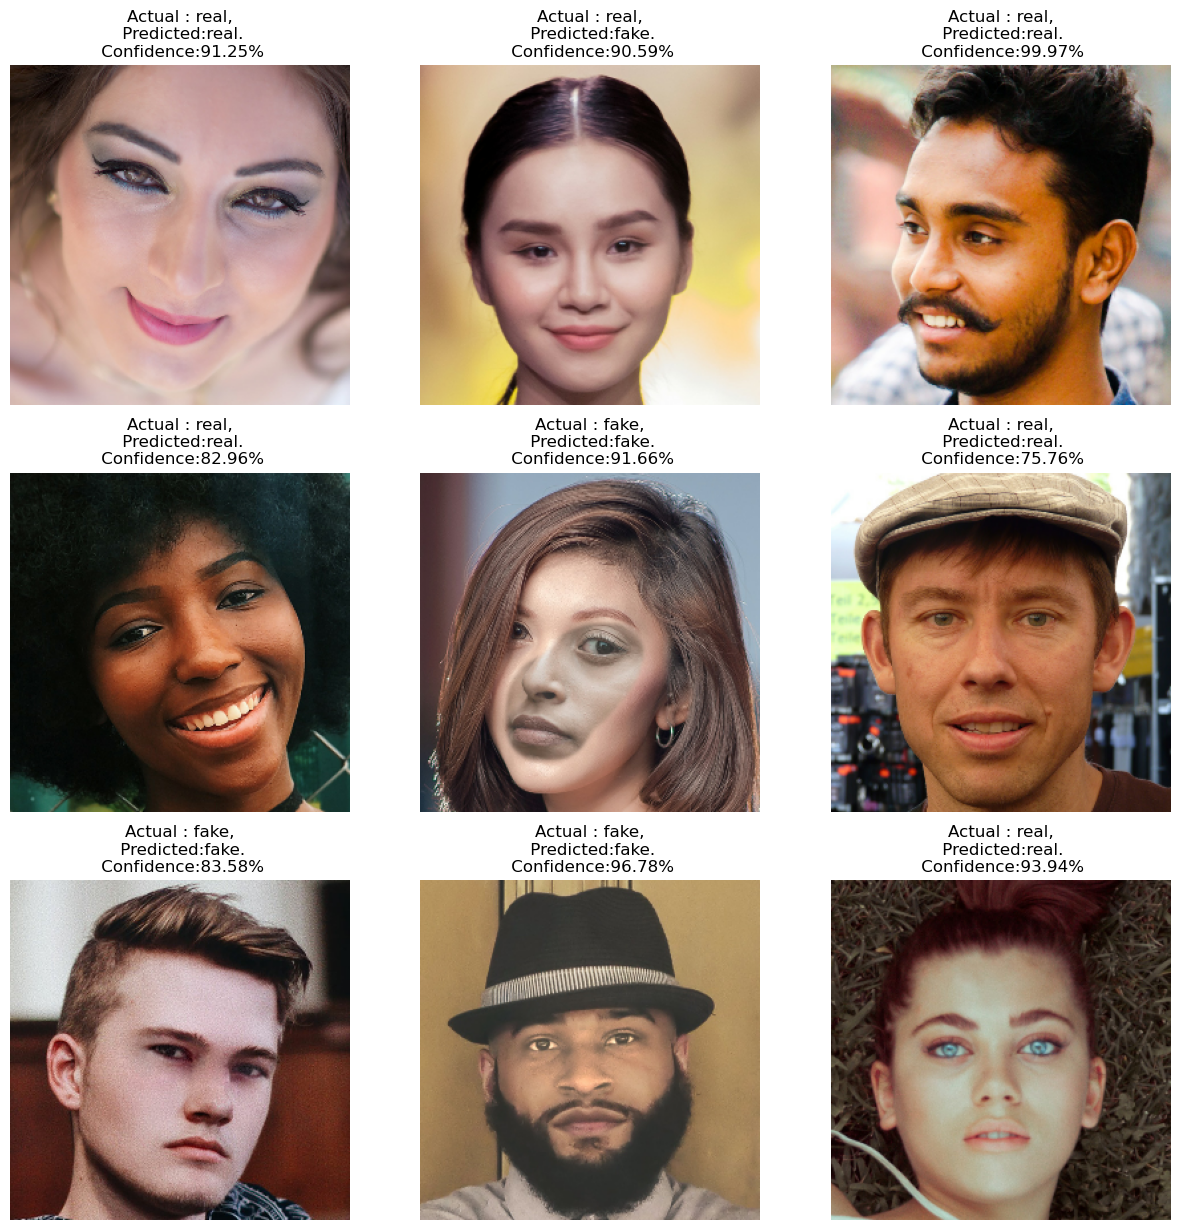

In [20]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = pred(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual : {actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")

        plt.axis("off")

In [26]:
# saving the model
import pickle

with open('model.pt','wb') as f:
  pickle.dump(model,f)


In [27]:
# to run the pickle(saved model)

with open('model.pt','rb') as f:
  model_saved = pickle.load(f)
